# Data Analysis & Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


from scipy.stats import f_oneway
import numpy as np

### Carga de dataset

In [2]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 8))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=50,ax=ax, facecolor='midnightblue', edgecolor='black')
        title_obj = ax.set_title(var_name+" Distribution")
        plt.setp(title_obj, color='black')                     # Individual title colours.

        # remove grid lines
        ax.grid(False)

        ax.xaxis.label.set_color('black')  
        ax.yaxis.label.set_color('black')          
        ax.tick_params(axis='x', colors='black')       #set the color of xticks
        ax.tick_params(axis='y', colors='black')       #set the color of yticks
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [3]:
# Paso 1 - Creadondo data set de prueba
df = pd.read_csv("data/fact_application_v2.csv")
df

,applicationcode,redsecuritydensity,yellowsecuritydensity,redfaulttolerancedensity,yellowfaulttolerancedensity,redperformancedensity,yellowperformancedensity,redcostoptimizingdensity,yellowcostoptimizingdensity,pdnresourcessize
0,app00035,0.038,0.077,0.000,0.000,0.0,0.000,0.0,0.0,1.415
1,app00032,0.014,0.058,0.000,0.029,0.0,0.000,0.0,0.0,1.839
2,app00036,0.000,0.012,0.000,0.002,0.0,0.000,0.0,0.0,2.814
3,app00031,0.000,0.026,0.000,0.051,0.0,0.000,0.0,0.0,1.591
4,app00033,0.016,0.016,0.000,0.000,0.0,0.000,0.0,0.0,1.806
...,...,...,...,...,...,...,...,...,...,...
648,app00882,0.069,0.092,0.023,0.011,0.0,0.000,0.0,0.0,1.940
649,app00069,0.000,0.032,0.000,0.016,0.0,0.000,0.0,0.0,1.799
650,app00068,0.000,0.167,0.000,0.100,0.0,0.033,0.0,0.0,1.477
651,app00066,0.000,0.013,0.000,0.000,0.0,0.000,0.0,0.0,1.875


In [4]:
df.describe()

,redsecuritydensity,yellowsecuritydensity,redfaulttolerancedensity,yellowfaulttolerancedensity,redperformancedensity,yellowperformancedensity,redcostoptimizingdensity,yellowcostoptimizingdensity,pdnresourcessize
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,0.027322,0.090749,0.005496,0.045643,0.000028,0.005798,0.000020,0.000544,1.622894
std,0.068309,0.120340,0.031505,0.078281,0.000501,0.019052,0.000437,0.004374,0.669225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301000
25%,0.000000,0.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.176000
50%,0.000000,0.053000,0.000000,0.021000,0.000000,0.000000,0.000000,0.000000,1.785000
75%,0.023000,0.108000,0.000000,0.051000,0.000000,0.003000,0.000000,0.000000,2.057000
max,0.667000,1.000000,0.500000,0.500000,0.010000,0.250000,0.011000,0.061000,3.972000


In [5]:
# Porcentaje de 0s de cada columna
(df == 0).sum()/len(df) * 100

applicationcode                 0.000000
redsecuritydensity             50.382848
yellowsecuritydensity          16.385911
redfaulttolerancedensity       87.595712
yellowfaulttolerancedensity    30.627871
redperformancedensity          99.693721
yellowperformancedensity       73.813170
redcostoptimizingdensity       99.693721
yellowcostoptimizingdensity    97.549770
pdnresourcessize                0.000000
dtype: float64

In [6]:
df.dtypes

applicationcode                 object
redsecuritydensity             float64
yellowsecuritydensity          float64
redfaulttolerancedensity       float64
yellowfaulttolerancedensity    float64
redperformancedensity          float64
yellowperformancedensity       float64
redcostoptimizingdensity       float64
yellowcostoptimizingdensity    float64
pdnresourcessize               float64
dtype: object

La variable `applicationcode` es un identificador de cada aplicación desplegada, se deja en el dataset dado que puede ser utilizada para explicar el modelo y dar interpretabilidad a los clusters generados.

In [7]:
features = df.columns.to_list()
features.remove('applicationcode')

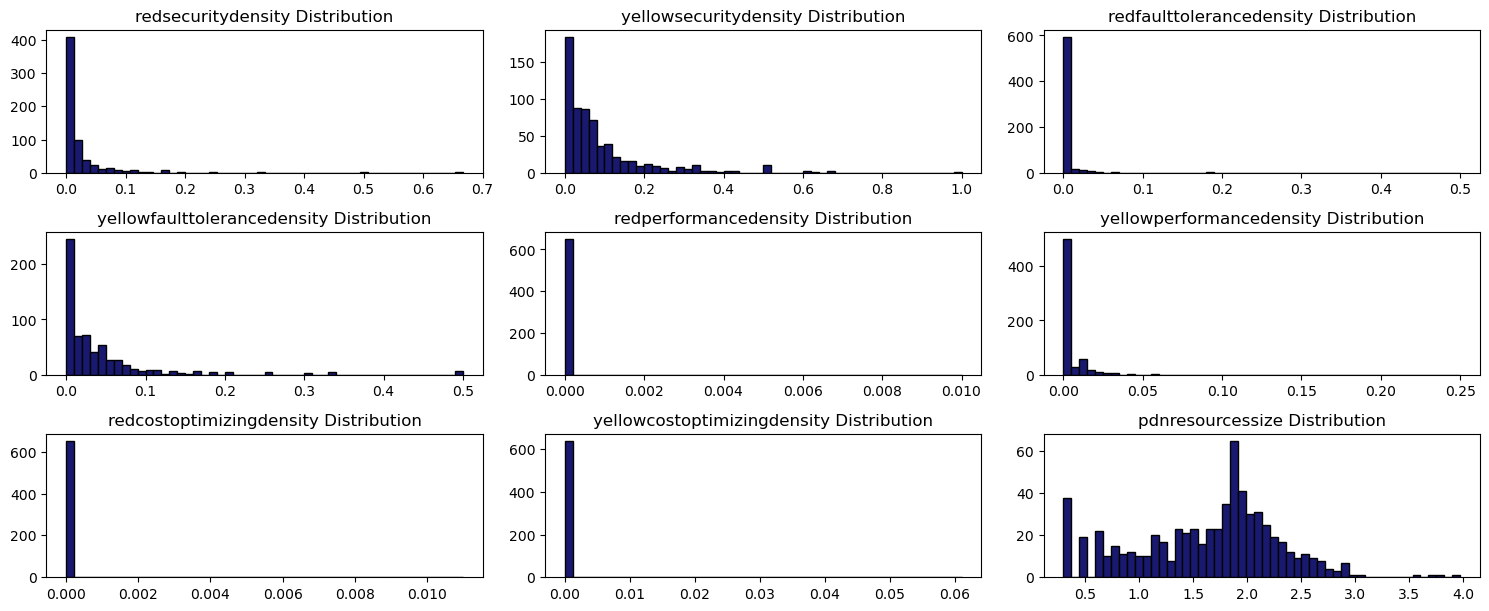

In [11]:
draw_histograms(df, features, 4, 3)

<Axes: >

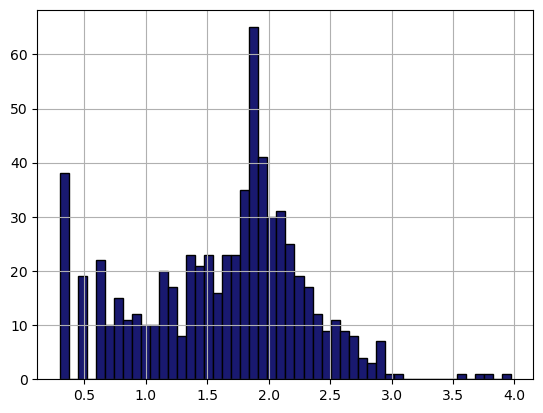

In [16]:
df['pdnresourcessize'].hist(bins=50, facecolor='midnightblue', edgecolor='black')

Al realizar el logaritmo a la variable pdnresourcessize se encuentra una mejor distribución, y esto permite que el modelo pueda tener información sobre la carga de trabajo que esta siendo analizada.


# Preprocesamiento de datos

In [15]:
df0 = df[df['pdnresourcessize'] != 0]
df0 = df0.dropna()
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 652
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   applicationcode              653 non-null    object 
 1   redsecuritydensity           653 non-null    float64
 2   yellowsecuritydensity        653 non-null    float64
 3   redfaulttolerancedensity     653 non-null    float64
 4   yellowfaulttolerancedensity  653 non-null    float64
 5   redperformancedensity        653 non-null    float64
 6   yellowperformancedensity     653 non-null    float64
 7   redcostoptimizingdensity     653 non-null    float64
 8   yellowcostoptimizingdensity  653 non-null    float64
 9   pdnresourcessize             653 non-null    float64
dtypes: float64(9), object(1)
memory usage: 56.1+ KB


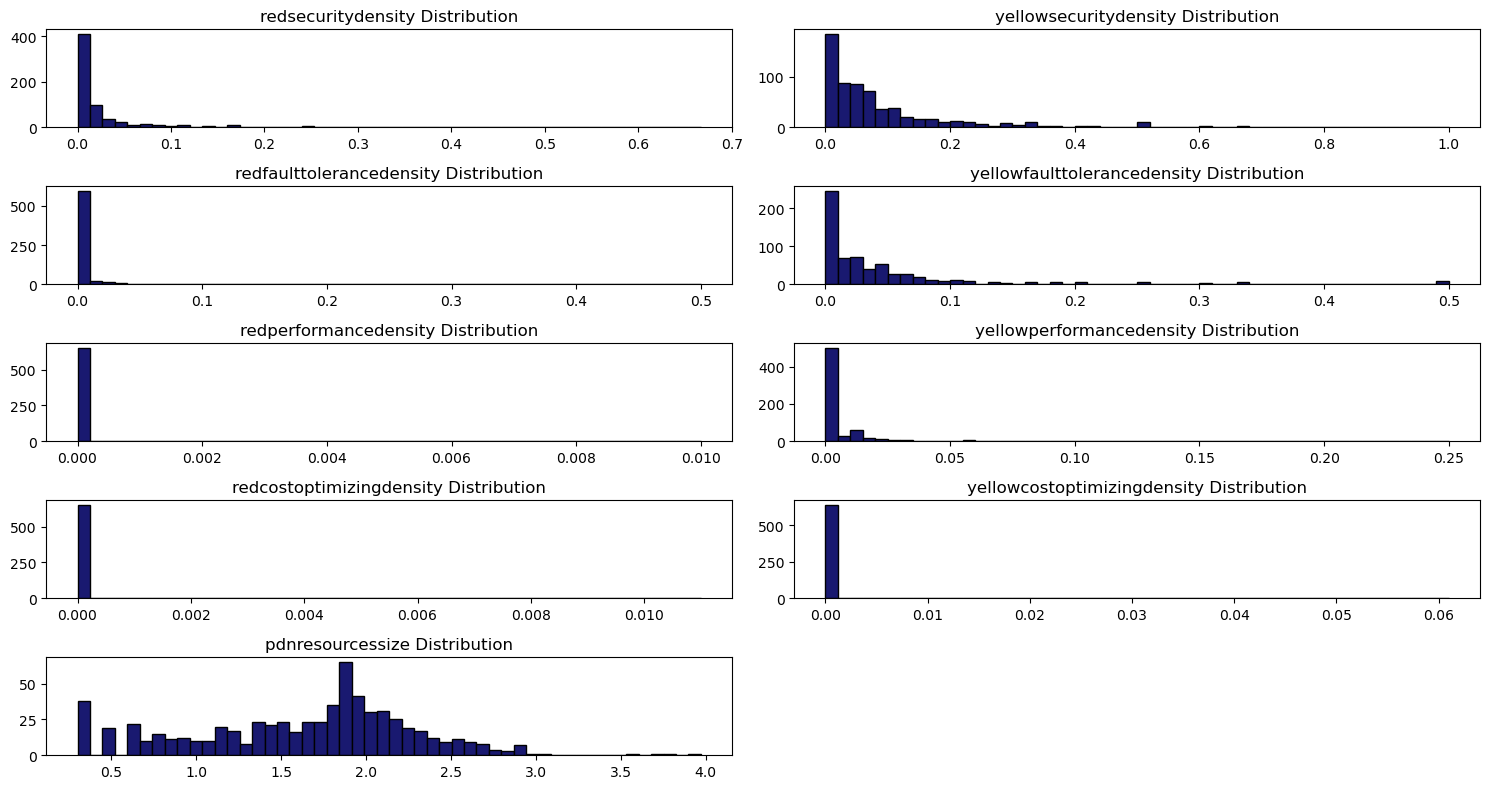

In [17]:
draw_histograms(df0, features, 5, 2)

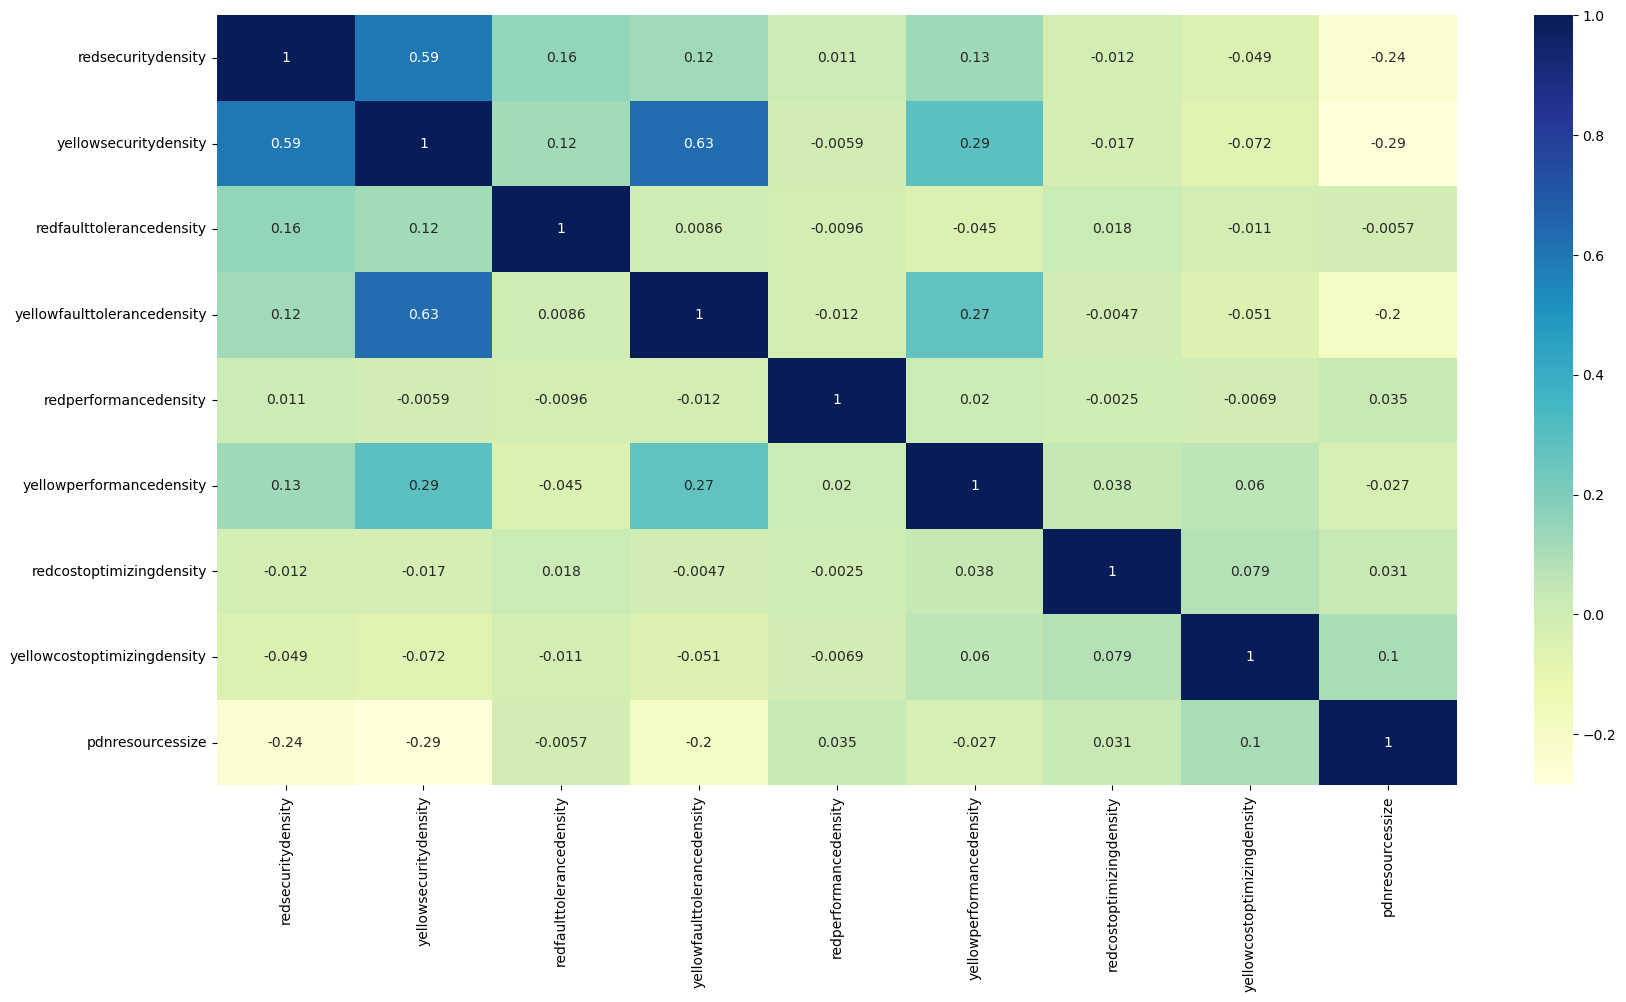

In [18]:
# heatmap of correlation
plt.figure(figsize=(20,10))
sns.heatmap(df0[features].corr(), annot=True, cmap="YlGnBu")
plt.show()

Se encuentra correlacion entre la densidad de los checks amarillos y rojos en el pilar de seguridad (yellowsecuritydensity y redsecuritydensity), también en otras variables como la densidad de checks amarillos del pilar de tolerancia de fallos con la densidad de checks rojos en el pilar seguridad (yellowfaulttolerancedensity y redsecuritydensity). En general las correlaciones no son tan grandes como para indicar redundancia en las dimensiones. La variable pdnresourcessize no tiene mucha correlación con el resto de variables. Esto es bueno porque significa que puede aportar información al modelo.

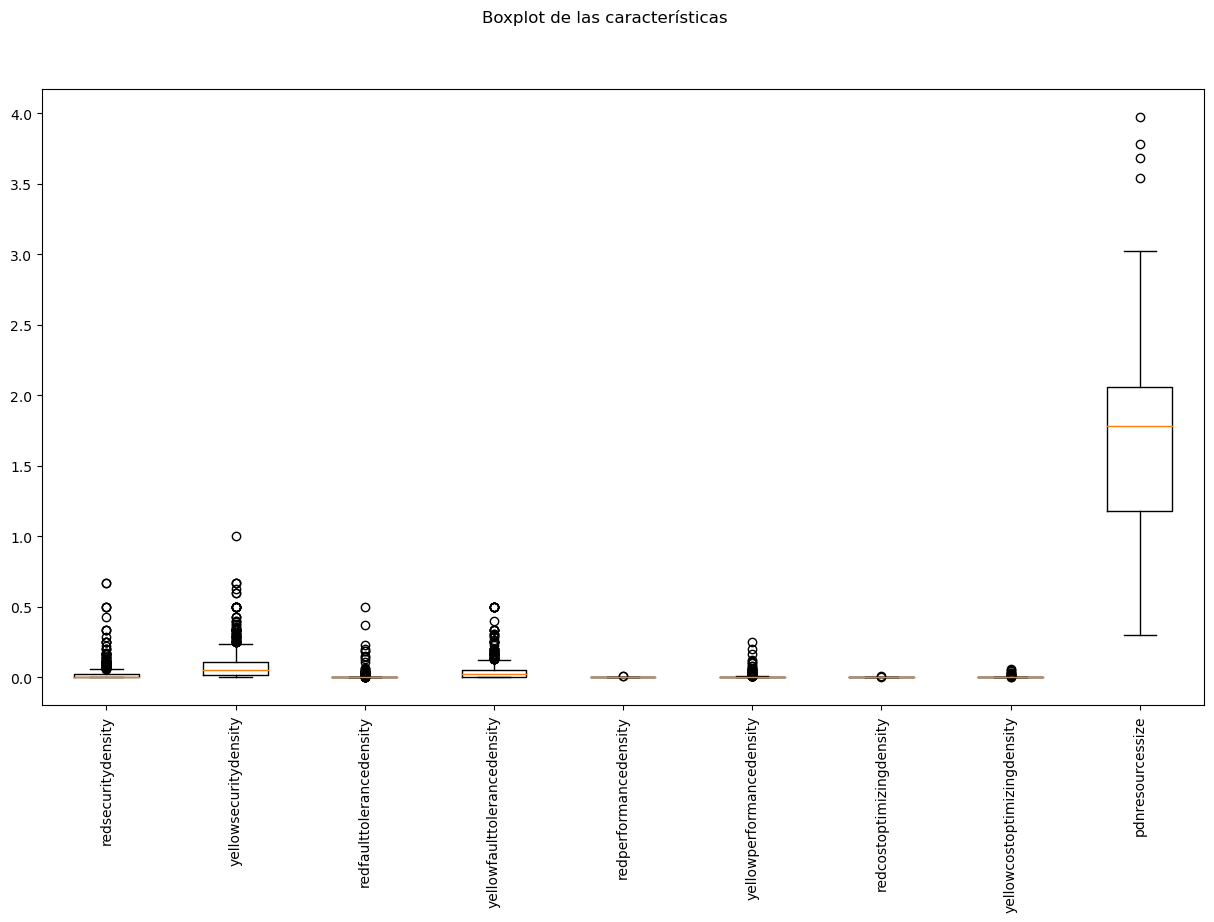

In [19]:
# boxplot for df0
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Boxplot de las características')
ax = fig.add_subplot(111)
plt.boxplot(df0[features])
ax.set_xticklabels(df0[features].columns, rotation=90)
plt.show()

In [20]:
df0.describe()

,redsecuritydensity,yellowsecuritydensity,redfaulttolerancedensity,yellowfaulttolerancedensity,redperformancedensity,yellowperformancedensity,redcostoptimizingdensity,yellowcostoptimizingdensity,pdnresourcessize
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,0.027322,0.090749,0.005496,0.045643,0.000028,0.005798,0.000020,0.000544,1.622894
std,0.068309,0.120340,0.031505,0.078281,0.000501,0.019052,0.000437,0.004374,0.669225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301000
25%,0.000000,0.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.176000
50%,0.000000,0.053000,0.000000,0.021000,0.000000,0.000000,0.000000,0.000000,1.785000
75%,0.023000,0.108000,0.000000,0.051000,0.000000,0.003000,0.000000,0.000000,2.057000
max,0.667000,1.000000,0.500000,0.500000,0.010000,0.250000,0.011000,0.061000,3.972000


c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


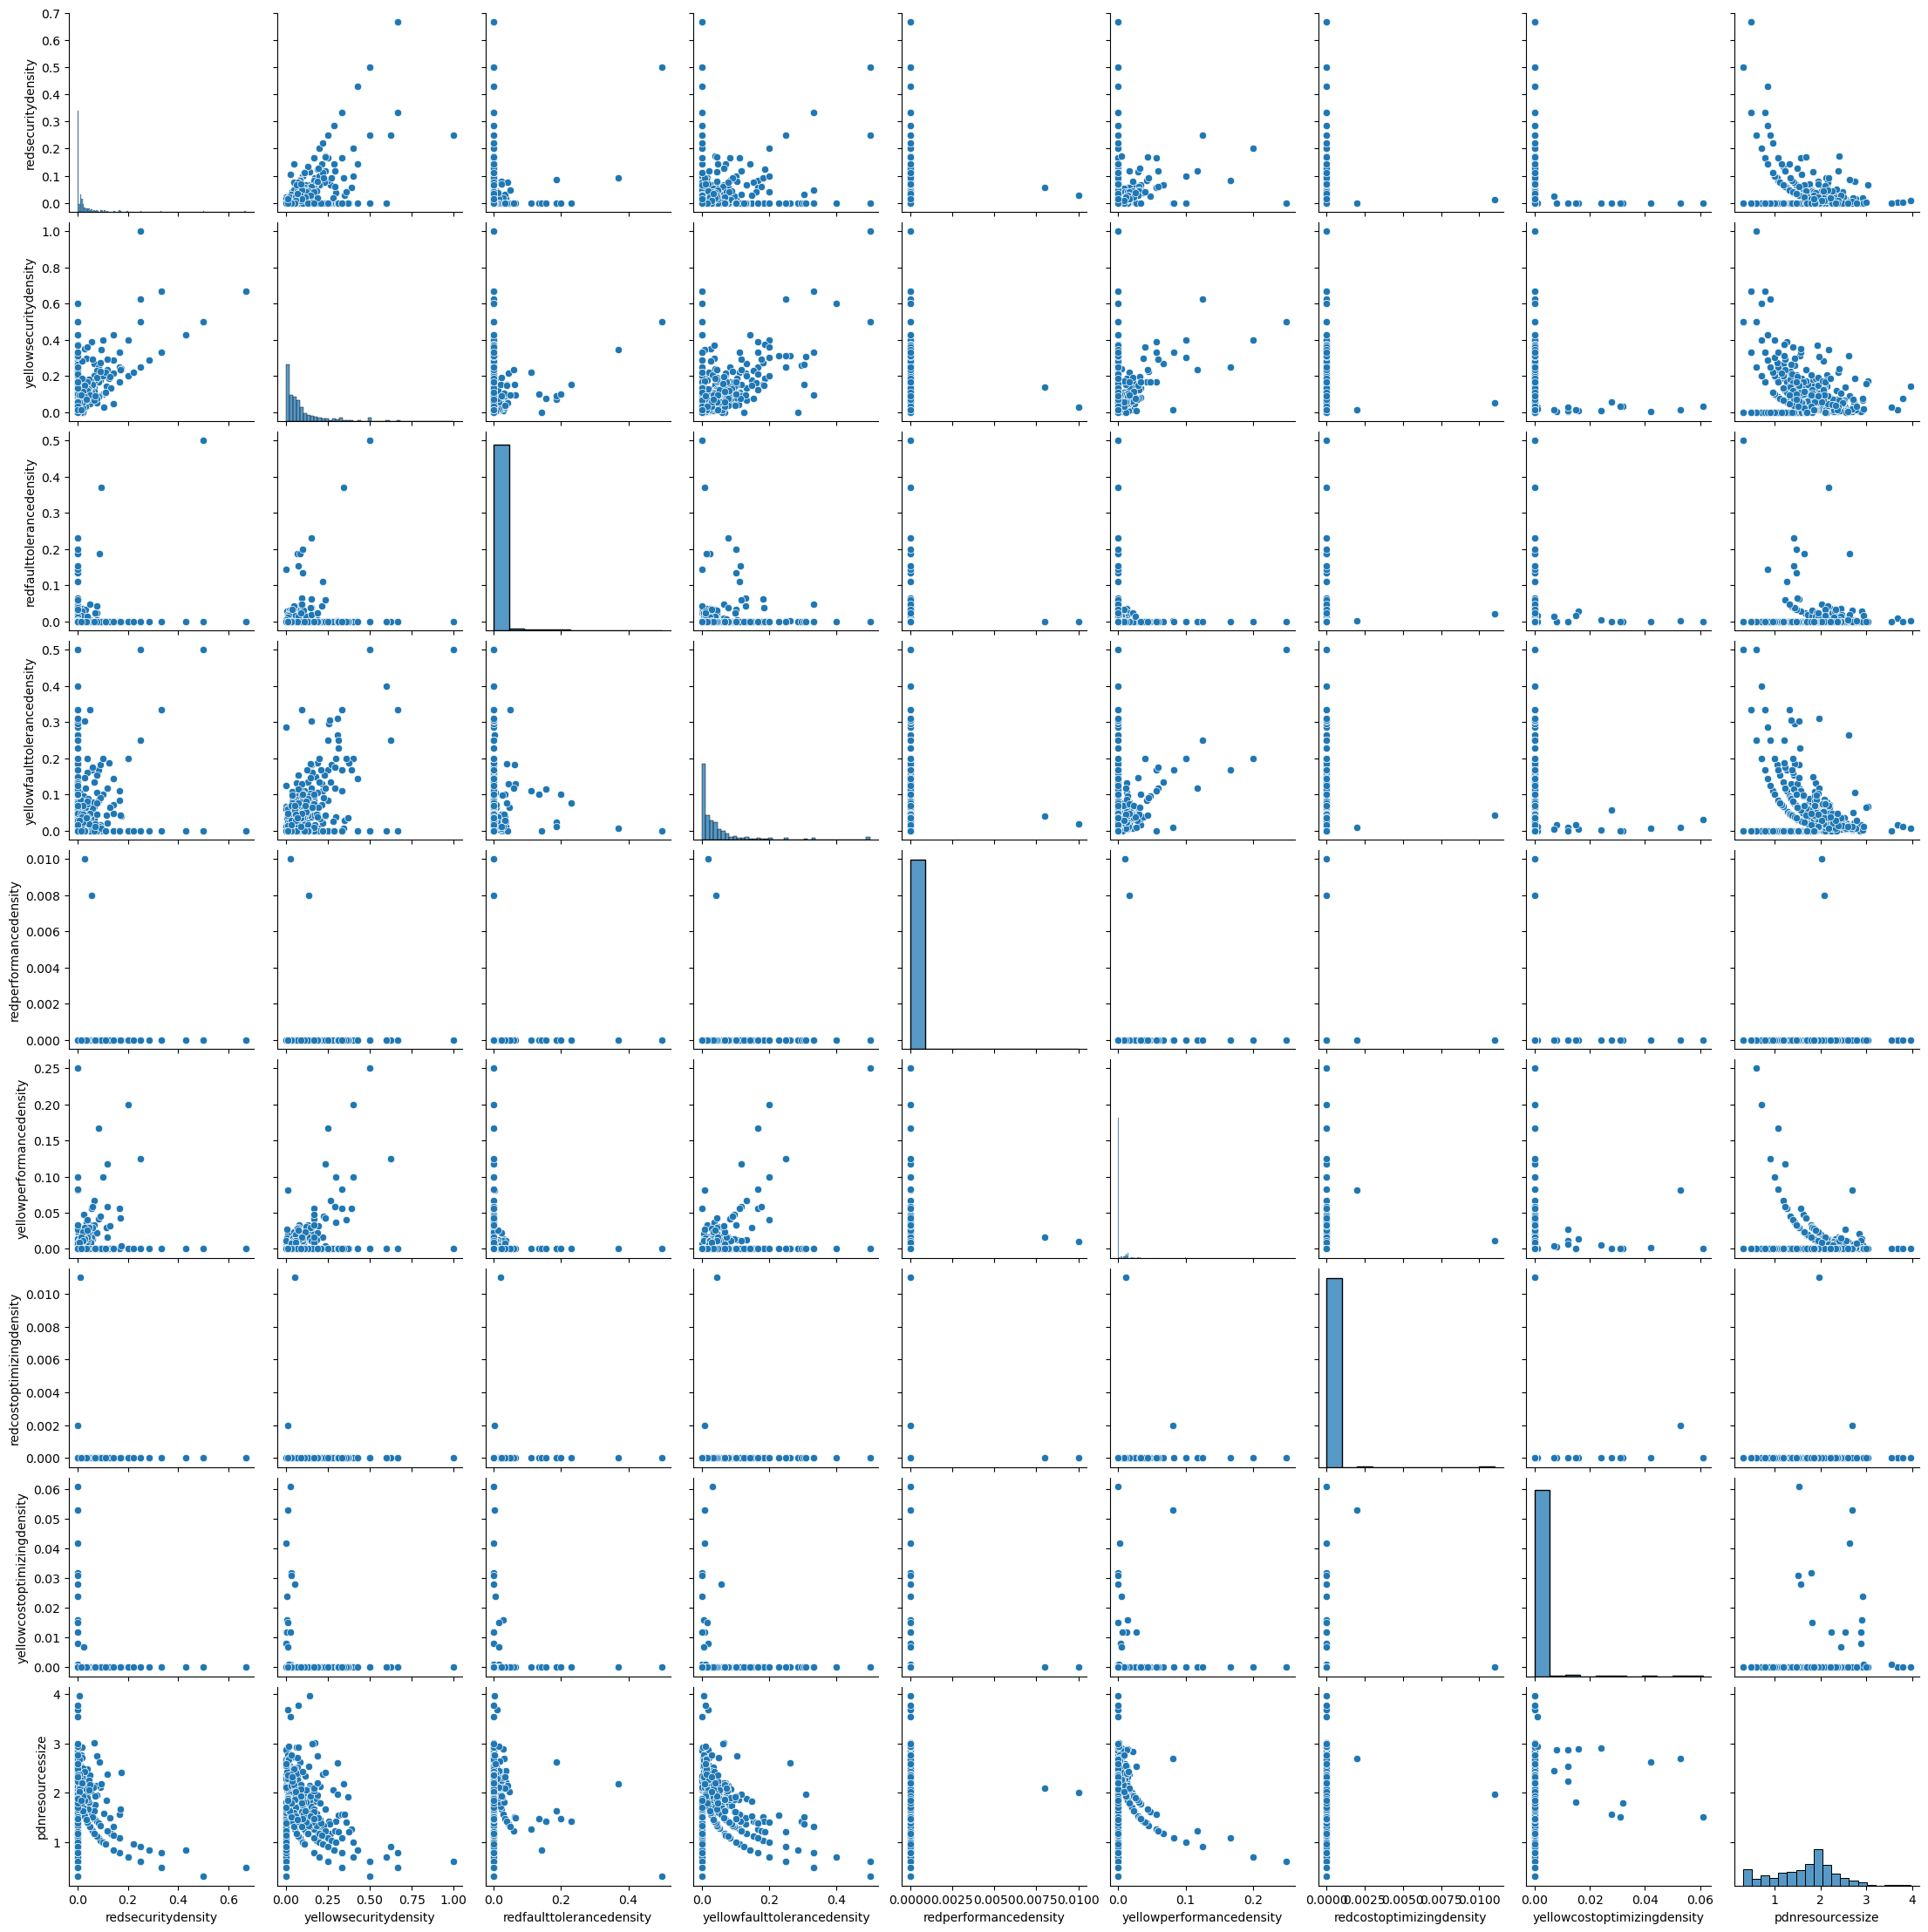

In [21]:
sns.pairplot(df0)

Vamos a remover los checks iguales a cero en todas las aplicaciones. Son aplicaciones en excelente estado de salud que no son objeto de análisis para la solución.

In [25]:
features

['redsecuritydensity',
 'yellowsecuritydensity',
 'redfaulttolerancedensity',
 'yellowfaulttolerancedensity',
 'redperformancedensity',
 'yellowperformancedensity',
 'redcostoptimizingdensity',
 'yellowcostoptimizingdensity',
 'pdnresourcessize']

In [31]:
df0 = df0.iloc[~(df0[df0.filter(regex="density").columns]==0).all(axis=1).values,:]

La normalización mejora notablemente la clusterización, se aplica para la variable pdnrsourcessize

In [32]:
# min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df0_scaled = scaler.fit_transform(df0[features])
df0_scaled = pd.DataFrame(df0_scaled, columns=df0[features].columns, index=df0.index)
df0_scaled = pd.concat([df0['applicationcode'], df0_scaled], axis=1)


In [33]:
df0_scaled.describe()

,redsecuritydensity,yellowsecuritydensity,redfaulttolerancedensity,yellowfaulttolerancedensity,redperformancedensity,yellowperformancedensity,redcostoptimizingdensity,yellowcostoptimizingdensity,pdnresourcessize
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,0.048282,0.106966,0.012957,0.107599,0.003249,0.027336,0.002133,0.010505,0.404586
std,0.109598,0.123841,0.068231,0.164746,0.054361,0.082059,0.043169,0.077752,0.153846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.032000,0.000000,0.016500,0.000000,0.000000,0.000000,0.000000,0.316263
50%,0.016492,0.066000,0.000000,0.056000,0.000000,0.000000,0.000000,0.000000,0.425497
75%,0.043478,0.129750,0.000000,0.126000,0.000000,0.028000,0.000000,0.000000,0.494007
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


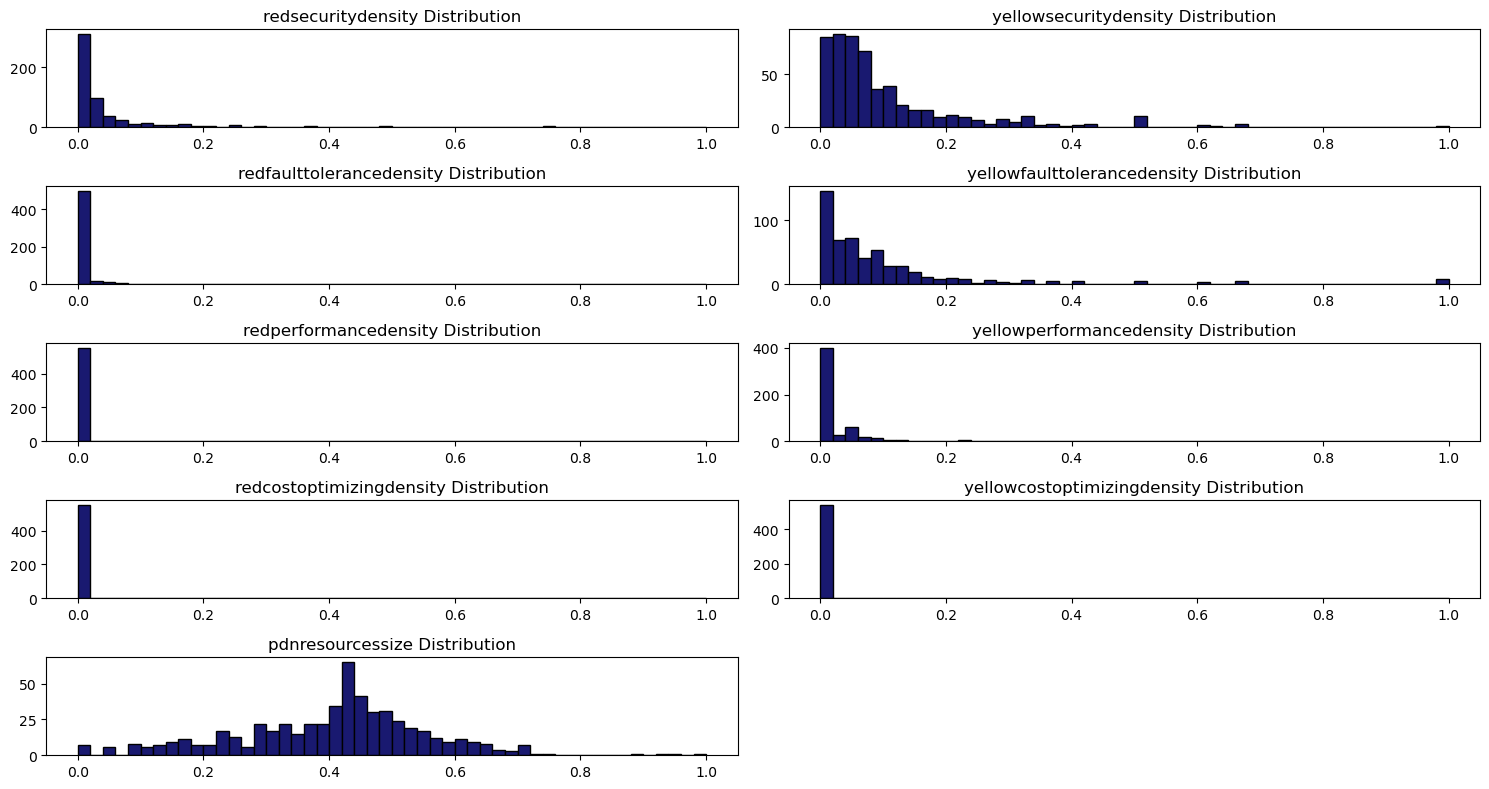

In [34]:
draw_histograms(df0_scaled, features, 5, 2)

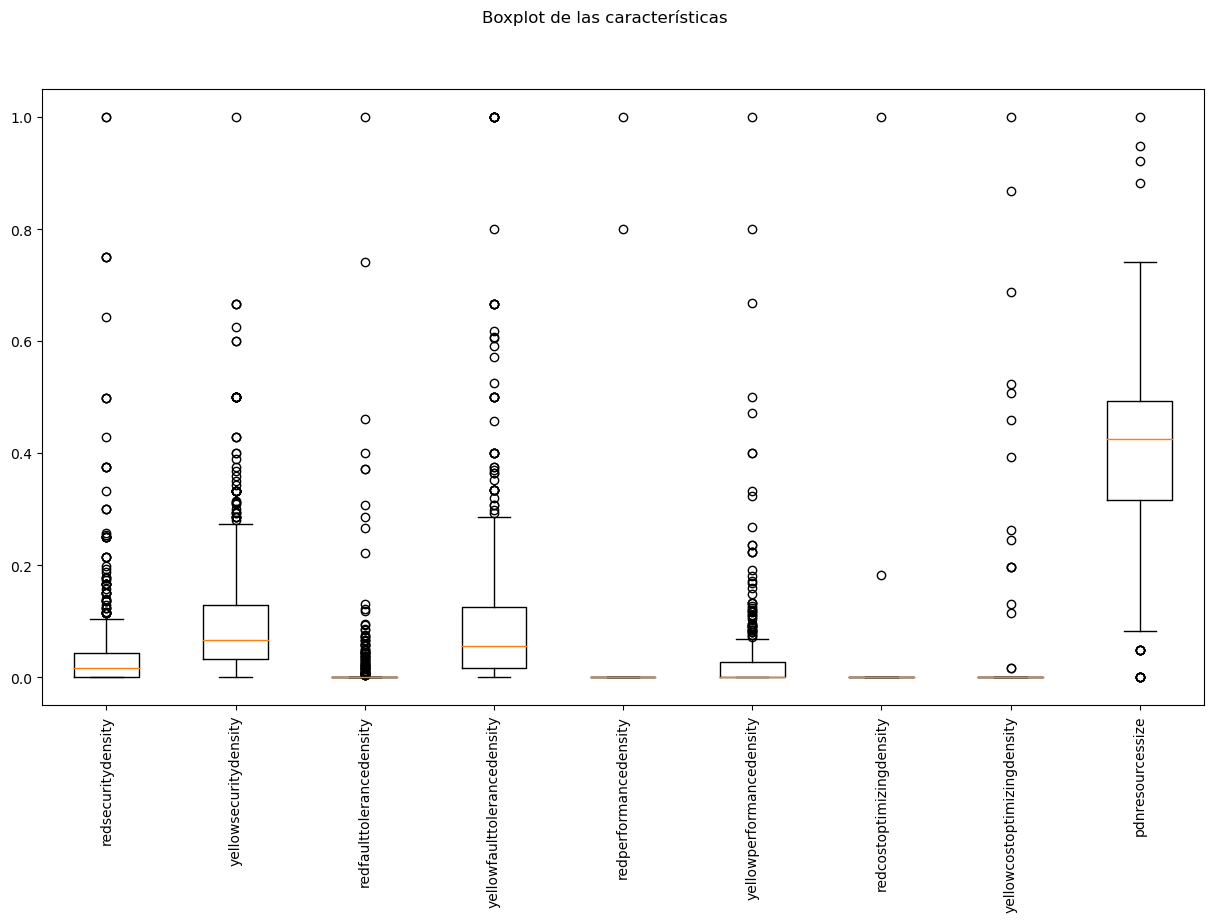

In [35]:
# boxplot for df0
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Boxplot de las características')
ax = fig.add_subplot(111)
plt.boxplot(df0_scaled[features])
ax.set_xticklabels(df0_scaled[features].columns, rotation=90)
plt.show()

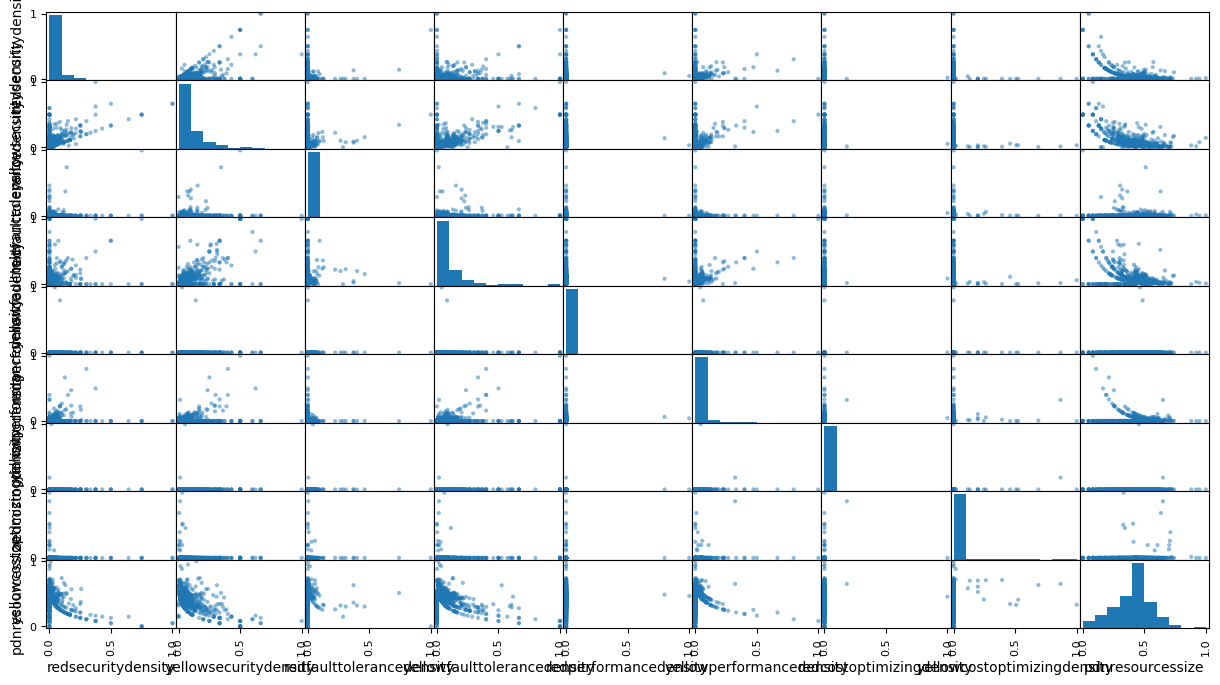

In [36]:
#scatter matrix
scatter_matrix(df0_scaled[features], figsize=(15, 8))
plt.show()

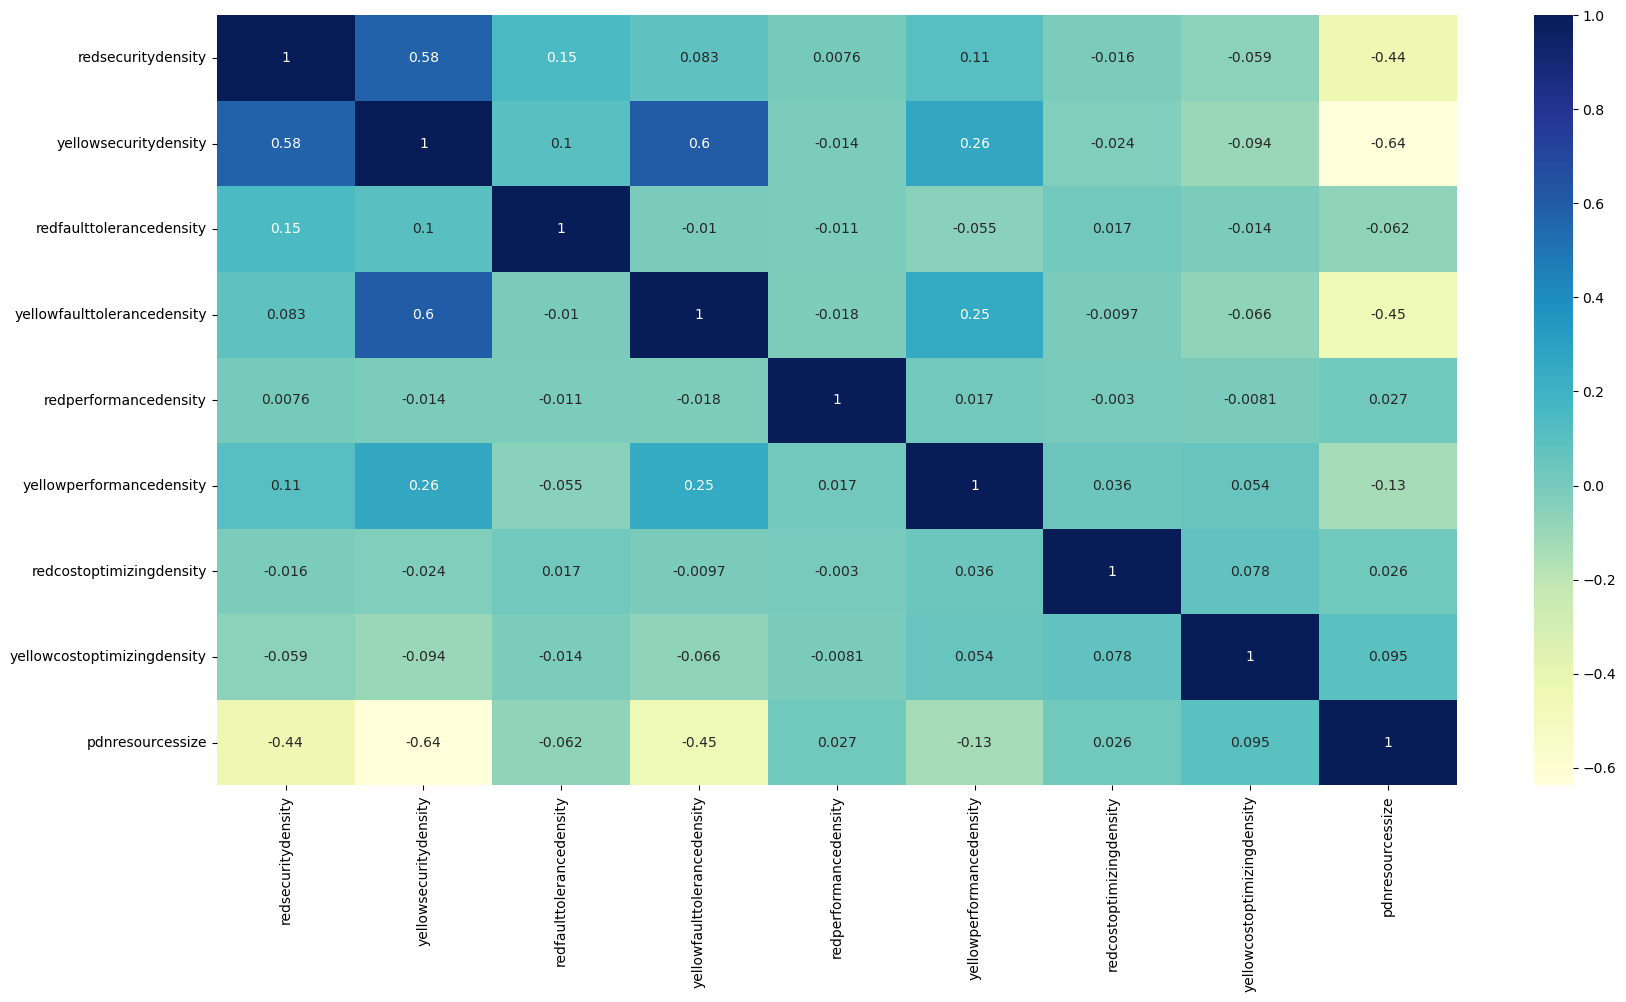

In [37]:
# heatmap of correlation
plt.figure(figsize=(20,10))
sns.heatmap(df0_scaled[features].corr(), annot=True, cmap="YlGnBu")
plt.show()


In [38]:
# save file
df0_scaled.to_csv("data/fact_application_v2_scaled.csv", index=False)